# Topology analysis for the Gippsland Basin

In this notebook, we are testing the combination of the pynoddy Experiment class with the topology analysis and apply it to the Gippsland Basin model. This notebook will evaluate three aspects:

1. Application of the Experiment class to set-up a topology experiment
2. Running the topology analysis for a range of models
3. Evaluating and visualising results

Further steps might include the parallelisation of the random model generation, let's see where we get...

In [1]:
from IPython.core.display import HTML
css_file = 'pynoddy.css'
HTML(open(css_file, "r").read())

In [6]:
%matplotlib inline

In [2]:
# here the usual imports. If any of the imports fails, make sure that pynoddy is installed
# properly, ideally with 'python setup.py develop' or 'python setup.py install'
import sys, os
import matplotlib.pyplot as plt
import numpy as np
# adjust some settings for matplotlib
from matplotlib import rcParams
# print rcParams
rcParams['font.size'] = 15
# determine path of repository to set paths corretly below
repo_path = os.path.realpath('../..')
import pynoddy.history
import pynoddy.experiment
rcParams.update({'font.size': 20})

## Creating an experiment object

First, we start with generating a pynoddy experiment object. The experiment class inherits all the methods from the base pynoddy.history class and we can directly import the Gippsland Basin model that we want to analyse into the object:

In [3]:
reload(pynoddy.experiment)
# the model itself is now part of the repository, in the examples directory:
history_file = os.path.join(repo_path, "examples/GBasin_Ve1_V4_b.his")
gipps_topo_ex = pynoddy.experiment.Experiment(history = history_file) 

 STRATIGRAPHY
 FOLD
 UNCONFORMITY
 FAULT
 FAULT
 UNCONFORMITY
 FAULT
 FAULT
 UNCONFORMITY
 FAULT
 FAULT
 UNCONFORMITY
 TILT
 FOLD


Some basic information about the model can be obtained with:

In [4]:
gipps_topo_ex.info()

************************************************************
			Model Information
************************************************************


This model consists of 14 events:
	(1) - STRATIGRAPHY
	(2) - FOLD
	(3) - UNCONFORMITY
	(4) - FAULT
	(5) - FAULT
	(6) - UNCONFORMITY
	(7) - FAULT
	(8) - FAULT
	(9) - UNCONFORMITY
	(10) - FAULT
	(11) - FAULT
	(12) - UNCONFORMITY
	(13) - TILT
	(14) - FOLD
The model extent is:
	x - 26630.0 m
	y - 19291.0 m
	z - 1500.0 m
Number of cells in each direction:
	nx = 532
	ny = 385
	nz = 30
The model origin is located at: 
	(0.0, 0.0, 1500.0)
The cubesize for model export is: 
	50 m


************************************************************
			Meta Data
************************************************************


The filename of the model is:
	 GBasin_Ve1_V4.his
It was last saved (if origin was a history file!) at:
	 12/11/2014 11:33:12



We can have a quick look at the model in a section view (note that Noddy is now executed in the background when required - and the output automatically generated in the required resolution):

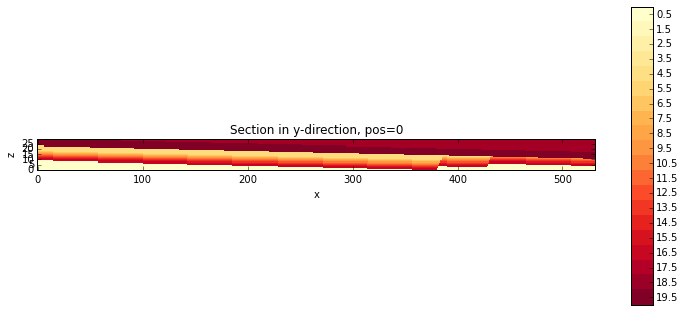

In [7]:
gipps_topo_ex.plot_section('y')

The base plot is not very useful - but we can create a section plot with a define vertical exaggeration (keyword ve) and plot the colorbar in horizontal orientation:

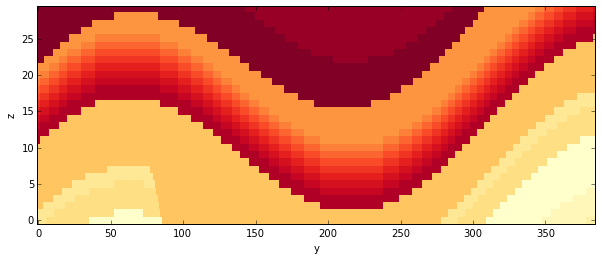

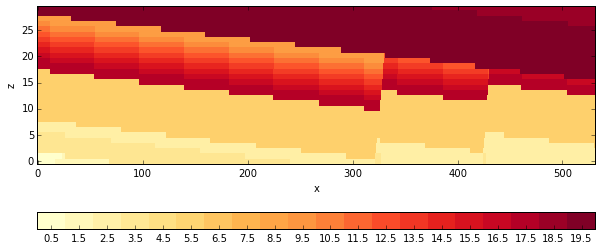

In [8]:
# gipps_topo_ex.determine_model_stratigraphy()
gipps_topo_ex.plot_section('x', ve = 5, position = 'centre',
                cmap = 'YlOrRd',
                title = '',
                colorbar = False)
gipps_topo_ex.plot_section('y', position = 100, ve = 5.,
                cmap = 'YlOrRd',
                title = '',
                colorbar_orientation = 'horizontal')

*Note: The names of the model stratigraphy (colorbar labels) are unfortunately not defined correctly in the input file - we need to fix that, then we should get useful labels, as well!*

## Loading parameters ranges from file

We now need to define the parameter ranges. This step can either be done through explicit definition in the notebook (see the previous notebook on the Experiment class), or a list of parameters and defined ranges plus statistics can be read in from a csv file. This enables the convenient parameter definition in a spreadsheed (for example through Excel).

In order to be read in correctly, the header should contain the labels:

- 'event' : event id
- 'parameter' : Noddy parameter ('Dip', 'Dip Direction', etc.)
- 'min' : minimum value
- 'max' : maximum value
- 'initial' : initial value

In addition, it is possible to define PDF type and parameters. For now, the following settings are supported:

- 'type' = 'normal' 
- 'stdev' : standard deviation
- 'mean' : mean value (default: 'initial' value)

We can read in the parameters simply with:

In [61]:
reload(pynoddy.experiment)
# the model itself is now part of the repository, in the examples directory:
history_file = os.path.join(repo_path, "examples/GBasin_Ve1_V4_b.his")
gipps_topo_ex = pynoddy.experiment.Experiment(history = history_file) 
gipps_topo_ex.load_parameter_file(os.path.join(repo_path, "examples/gipps_params.csv"))

 STRATIGRAPHY
 FOLD
 UNCONFORMITY
 FAULT
 FAULT
 UNCONFORMITY
 FAULT
 FAULT
 UNCONFORMITY
 FAULT
 FAULT
 UNCONFORMITY
 TILT
 FOLD


## Generating random perturbations of the model



Before generating random prerturbations, we should now store the base version so that we can always revert to it at a later stage:

In [62]:
gipps_topo_ex.freeze()

For a reproducible experiment, we can also set the random seed:

In [63]:
gipps_topo_ex.set_random_seed(12345)

And now, let's perturb the model:

In [64]:
gipps_topo_ex.random_perturbation()

{2: {'Z': -277.865152173745}, 3: {'Z': 196.5780572502714}, 4: {'Slip': 76.90225676118388}, 5: {'Slip': 135.29168351654496}, 6: {'Z': 88.64293405915885}, 7: {'Slip': -43.85697358355719}, 8: {'Slip': 12.412127567340804}, 9: {'Z': 30.26135619125114}, 10: {'Slip': -237.02316539567448}, 11: {'Slip': -126.59344916936925}, 12: {'Z': 11.98271246605509}, 13: {'Rotation': 1.6644135780383635}, 14: {'Y': -13106.96198692995}}


Let's see what happened: we can compare the new model to the base model as we stored it before:

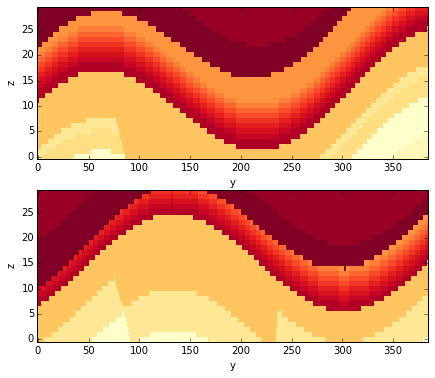

In [65]:
fig = plt.figure(figsize = (12,6))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
gipps_topo_ex.plot_section(ax = ax1, direction = 'x', model_type = "base", 
                           colorbar = False, title = "", ve = 5.)
gipps_topo_ex.plot_section(ax = ax2, direction = 'x', colorbar = False, 
                           title = "", ve = 5.)

In [66]:
b1 = gipps_topo_ex.get_section('x', resolution = 50, model_type = 'base')
# b1.plot_section(direction = 'x', colorbar = False, title = "", ve = 5.)
b2 = gipps_topo_ex.get_section('x', resolution = 50, model_type = 'current')
diff = b1 - b2

TypeError: unsupported operand type(s) for -: 'NoddyOutput' and 'NoddyOutput'

In [67]:
print b1

In [39]:
b1.shape

(532, 30)

...and another perturbation:

In [14]:
gipps_topo_ex.random_perturbation()

{2: {'Z': 188.99205546868865}, 3: {'Z': -75.38865347898968}, 4: {'Slip': 24.667410998222795}, 5: {'Slip': 2.218459865817252}, 6: {'Z': 75.83631450155792}, 7: {'Slip': 5.000935590418351}, 8: {'Slip': -65.24688414608954}, 9: {'Z': -121.83019765811389}, 10: {'Slip': -50.30873913603446}, 11: {'Slip': 22.289554583517685}, 12: {'Z': 5.131610092088749}, 13: {'Rotation': 4.083534679453123}, 14: {'Y': 15511.439296441264}}


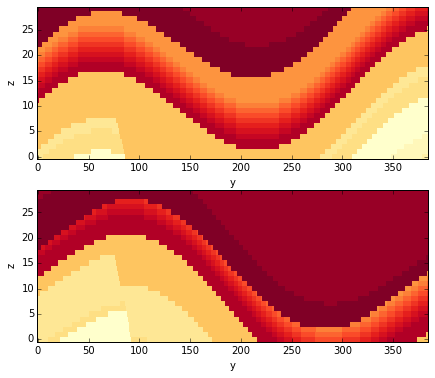

In [15]:
fig = plt.figure(figsize = (12,6))
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)
gipps_topo_ex.plot_section(ax = ax1, direction = 'x', model_type = "base", 
                           colorbar = False, title = "", ve = 5.)
gipps_topo_ex.plot_section(ax = ax2, direction = 'x', colorbar = False, 
                           title = "", ve = 5.)
# plot difference


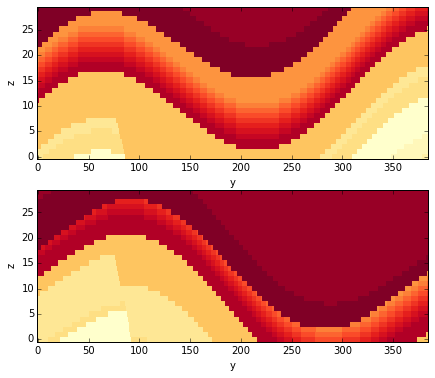

In [16]:
fig = plt.figure(figsize = (12,6))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
gipps_topo_ex.plot_section(ax = ax1, direction = 'x', model_type = "base", 
                           colorbar = False, title = "", ve = 5.)
gipps_topo_ex.plot_section(ax = ax2, direction = 'x', colorbar = False, 
                           title = "", ve = 5.)